#### **Importing Necesssary Libraries**

In [522]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random

#### **Genetating Dataset**

In [523]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

In [524]:
X

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537],
       [-2.97867201,  9.55684617],
       [ 6.04267315,  0.57131862],
       [-6.52183983, -6.31932507],
       [ 3.64934251,  1.40687195],
       [-2.17793419,  9.98983126],
       [ 4.42020695,  2.33028226],
       [ 4.73695639,  2.94181467],
       [-3.6601912 ,  9.38998415],
       [-3.05358035,  9.12520872],
       [-6.65216726, -5.57296684],
       [-6.35768563, -6.58312492],
       [-3.6155326 ,  7.8180795 ],
       [-1.77073104,  9.18565441],
       [-7.95051969, -6.39763718],
       [-6.60293639, -6.05292634],
       [-2.58120774, 10.01781903],
       [-7.76348463, -6.72638449],
       [-6.40638957, -6.95293851],
       [-2.97261532,  8.54855637],
       [-6.9567289 , -6.53895762],
       [-7.32614214, -6.0237108 ],
       [-2.14780202, 10.55232269],
       [-2.54502366, 10.57892978],
       [-2.96983639, 10.07140835],
       [ 3.22450809,  1.55252436],
       [-6.25395984, -7.73726715],
       [-7.85430886,

In [525]:
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

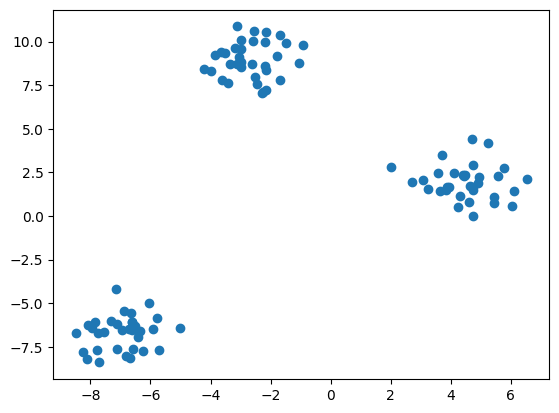

In [526]:
plt.scatter(X[:,0], X[:,1])

#### **Model**

In [527]:
class KMeans:
    def __init__(self, n_clusters, max_iter):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit_predict(self, X):
        self.X = X
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            cluster_group = self.__assign_clusters()
            old_centroids = self.centroids
            self.centroids = self.__move_centroid(cluster_group)

            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    
    def __assign_clusters(self):
        cluster_group = []

        for row in self.X:
            distances = []
            for centroid in self.centroids:
                distances.append(np.linalg.norm(row - centroid))
            cluster_group.append(distances.index(min(distances)))

        return np.array(cluster_group)
    
    def __move_centroid(self, cluster_group):
        new_centroid = []
        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroid.append(self.X[cluster_group == type].mean(axis=0))

        return np.array(new_centroid)

#### **Model Fit and Predict**

In [528]:
model = KMeans(3, 500)
pred = model.fit_predict(X)

#### **Visualization**

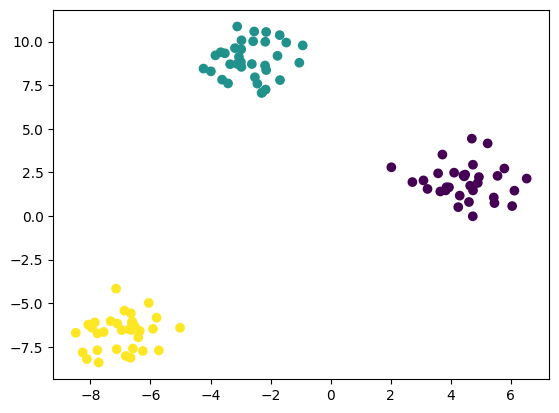

In [529]:
plt.scatter(X[:,0], X[:,1], c=pred)